<a href="https://colab.research.google.com/github/RaquelRamos/20160638/blob/master/Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prophet**

O modelo prophet segue o modelo sklearn API. Este modelo contem os metodos de fit e predict.
A entrada para o Prophet é sempre um dataframe com duas colunas, ds e y. A coluna ds tem que ter de um formato perceptivel ao Pandas, de preferência Ano-Mes-Dia para uma data. A coluna y deve ser uma coluna preenchida por valores númericos e que represente os valores que queremos prever.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd 
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime as dt
from datetime import datetime
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from fbprophet import Prophet



url = 'https://raw.githubusercontent.com/IvoPascoal/IvoP_20160462/master/DUQ_hourly.csv'
df1 = pd.read_csv(url, index_col=[0], parse_dates=[0])



df1 = df1.groupby(pd.Grouper(freq="D")).sum()
df1 = df1.loc[:'2018-08-02']


def create_features(df1, label=None):
      
  df1 = df1.copy()
  df1['Data'] = df1.index
  df1['Dia da Semana'] = df1['Data'].dt.dayofweek
  df1['Trimestre'] = df1['Data'].dt.quarter
  df1['Mês'] = df1['Data'].dt.month
  df1['Ano'] = df1['Data'].dt.year
  df1['Dia do Ano'] = df1['Data'].dt.dayofyear
  df1['Dia do Mês'] = df1['Data'].dt.day

    
  X = df1[['Dia da Semana','Trimestre','Mês','Ano','Dia do Ano','Dia do Mês']]
    
  if label:
    y = df1[label]
    return X, y
  return X

X, y = create_features(df1, label='DUQ_MW')

features_and_target = pd.concat([X, y], axis=1)

features_and_target.head(100000)


treino = features_and_target.loc[:'2017-12-31']
teste = features_and_target.loc['2018-01-01':]


treino = treino.reset_index().rename(columns={'Datetime':'ds', 'DUQ_MW':'y'})
teste = teste.reset_index().rename(columns={'Datetime':'ds', 'DUQ_MW':'y'})

model = Prophet()

def fim_de_semana(ds):
    date = pd.to_datetime(ds)
    if (date.weekday() == 5 or date.weekday() == 6):
        return 1
    else:
        return 0
treino['Fim de Semana'] = treino['ds'].apply(fim_de_semana)
teste['Fim de Semana'] = teste['ds'].apply(fim_de_semana)

model.add_regressor('Fim de Semana')


def inicio_fim_mes(ds):
    date = pd.to_datetime(ds)
    if (date.day < 5 or date.day > 25):
        return 1
    else:
        return 0
treino['Início/Fim do Mes'] = treino['ds'].apply(inicio_fim_mes)
teste['Início/Fim do Mes'] = teste['ds'].apply(inicio_fim_mes)

model.add_regressor('Início/Fim do Mes')


def estacao_ano(ds):
    date = pd.to_datetime(ds)
    if (date.month > 6 and date.month < 10):
        return 2 #verão
    else:
        return 4 #inverno

treino['Estação do Ano'] = treino['ds'].apply(estacao_ano)
teste['Estação do Ano'] = teste['ds'].apply(estacao_ano)


model.add_regressor('Estação do Ano')

model.fit(treino.reset_index().rename(columns={'Datetime':'ds', 'DUQ_MW':'y'}))


ivo = model.predict(df=teste.reset_index().rename(columns={'Datetime':'ds'}))



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# **MSE**

In [33]:
mean_squared_error(y_true=teste['y'], y_pred=ivo['yhat'])

17737447.301075842

# **MAE**

In [34]:
mean_absolute_error(y_true=teste['y'], y_pred=ivo['yhat'])

3152.572260820986

# **RMSE**

In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=teste['y'], y_pred=ivo['yhat'])

7.835008062105726

# **Gráficos de Previsão**

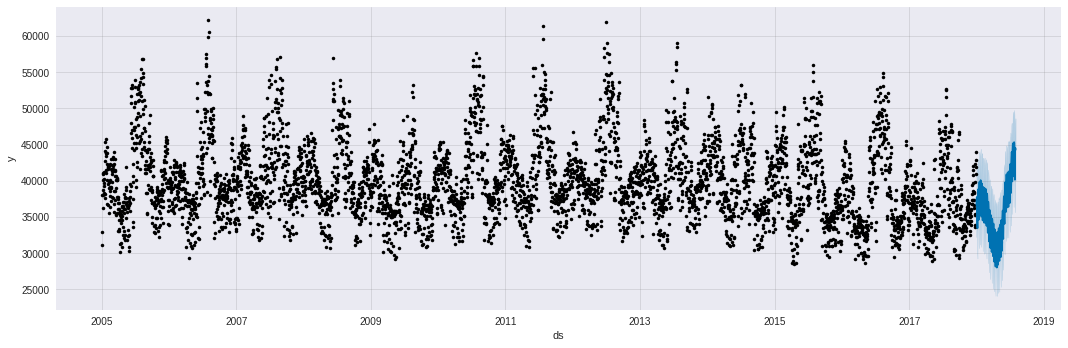

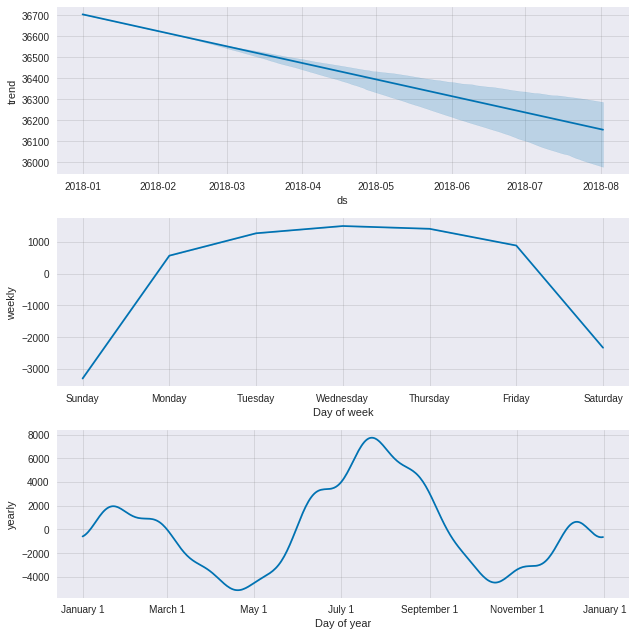

In [0]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(previsao, ax=ax)

fig = model.plot_components(previsao)

No gráfico abaixo é possível ver a azul os valores reais do consumo ocorridos no período do nosso Teste e a vermelho as previsões obtidas pelo nosso modelo

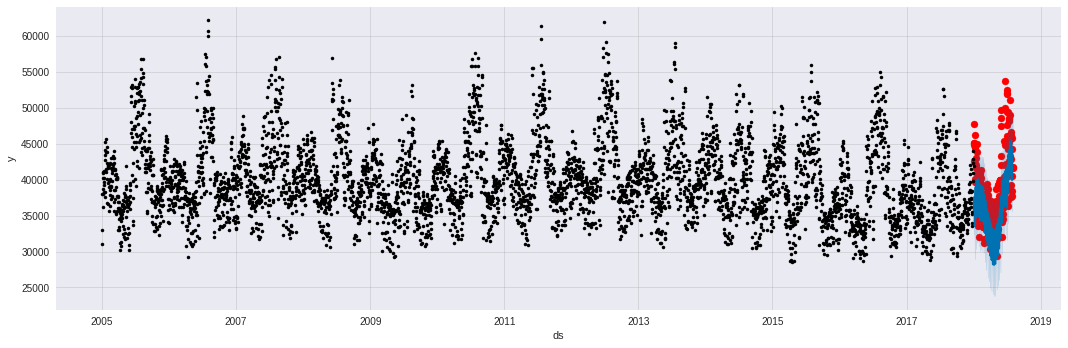

In [37]:
nunu = teste.set_index('ds')

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(nunu.index, teste['y'], color='r')
fig = model.plot(ivo, ax=ax)



No gráfico seguinte observa-se uma comparação mais detalhada entre os valores previstos representados pelos pontinhos vermelhos e os valores reais representados a azul

(0, 60000)

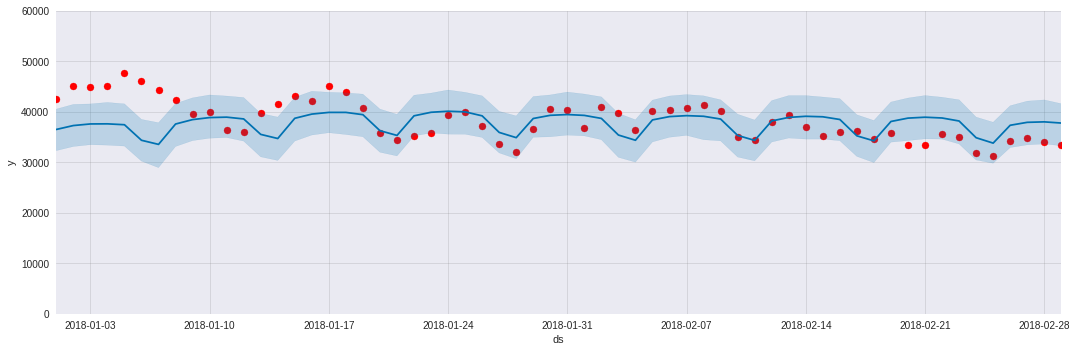

In [38]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(nunu.index, teste['y'], color='r')
fig = model.plot(ivo, ax=ax)
ax.set_xbound(lower='03-01-2018', upper='01-01-2018')
ax.set_ylim(0, 60000)




---



# **Random Forest Regressor**

O Random Forrest é um tecnica que consiste em realizar tarefas de regressão em um conjunto de dados com o uso de multiplas arvores de decisao.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime as dt
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import scikitplot as skplt

url = 'https://raw.githubusercontent.com/RaquelRamos/20160638/master/DUQ_hourly.csv'
df1 = pd.read_csv(url)

df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df1 = df1.set_index('Datetime')

df1 = df1.loc[:'2018-08-02']

df1 = df1.groupby(pd.Grouper(freq="D")).sum()


def create_features(df1, label=None):
  
  df1 = df1.copy()
  df1['Data'] = df1.index
  df1['Dia da Semana'] = df1['Data'].dt.dayofweek
  df1['Trimestre'] = df1['Data'].dt.quarter
  df1['Mes'] = df1['Data'].dt.month
  df1['Ano'] = df1['Data'].dt.year
  df1['Dia do Ano'] = df1['Data'].dt.dayofyear
  df1['Dia do Mes'] = df1['Data'].dt.day
  df1['Estação'] = df1.index

    
  X = df1[['Dia da Semana','Trimestre','Mes','Ano','Dia do Ano','Dia do Mes', 'Estação']]
  
  if label:
    y = df1[label]
    return X, y
  return X

X, y = create_features(df1, label='DUQ_MW')

features_and_target = pd.concat([X, y], axis=1)
features_and_target.head(100000)

features_and_target['Estação'] = features_and_target['Estação'].dt.strftime('%Y-%m-%d')

year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year
features_and_target['year'] = features_and_target['Estação'].map(year)

  
seasons = [0,0,1,1,1,2,2,2,3,3,3,0] #dec - feb is winter, then spring, summer, fall etc
season = lambda x: seasons[(datetime.strptime(x, "%Y-%m-%d" ).month-1)]

features_and_target['DATATATA'] = features_and_target['Estação'].map(season)
  

conditions = [(features_and_target['DATATATA'] == [0]), 
              (features_and_target['DATATATA'] == [1]),
              (features_and_target['DATATATA'] == [2]),
              (features_and_target['DATATATA'] == [3])]

choices = ['Inverno', 'Primavera', 'Verão', 'Outono']

features_and_target['Estação'] = np.select(conditions, choices)

features_and_target['Fim de Semana'] = features_and_target['Dia da Semana']

conditions = [(features_and_target['Dia da Semana'] > [4]) , (features_and_target['Dia da Semana'] <= [4])]
choices = [0, 1] #0 - Sim e 1 - Não
features_and_target['Fim de Semana'] = np.select(conditions, choices)

features_and_target['Início/Fim do Mes'] = features_and_target['Dia do Mes']

conditions = [(features_and_target['Dia do Mes'] <= [5]) & (features_and_target['Dia do Mes'] > [25]) , (features_and_target['Dia do Mes'] > [5]) & (features_and_target['Dia do Mes'] <= [25])]
choices = [0, 1] #0 - Início/Fim e 1 - Meio do Mes
features_and_target['Início/Fim do Mes'] = np.select(conditions, choices)


treino = features_and_target.loc[:'2017-12-31']
teste = features_and_target.loc['2018-01-01':]


X_treino = pd.DataFrame(treino.iloc[:, [0, 1, 2, 3, 4, 5, 9, 10, 11]])
y_treino = pd.DataFrame(treino['DUQ_MW'])

X_teste = pd.DataFrame(teste.iloc[:, [0, 1, 2, 3, 4, 5, 9, 10, 11]])
y_teste = pd.DataFrame(teste['DUQ_MW'])

regressor = RandomForestRegressor(n_estimators=1000,random_state=0)
regressor.fit(X_treino, y_treino)

y_pred = regressor.predict(X_teste)


ImportError: ignored

# **Score do Treino**

In [0]:
score_train = regressor.score(X_treino, y_treino)
score_train

0.9656008450097999

# **MSE**

In [0]:
mean_squared_error(y_true=teste['DUQ_MW'], y_pred=y_pred)

15834940.356999218

# **MAE**

In [0]:
mean_absolute_error(y_true=teste['DUQ_MW'], y_pred=y_pred)

3028.773285046729

# **RMSE**

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=y_teste, y_pred=y_pred)

13.515522825294813



---



# **Regressão Linear**

Regressão linear é um modelo usado para mostrar previsoes relacionada entre duas variaveis ou fatores.
Os valores que vão ser previstos são chamados de variaveis dependentes, enquanto os que são utilizados para prever são chamados de variaveis independentes.

In [0]:
import numpy as np 
import pandas as pd
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime



url = 'https://raw.githubusercontent.com/IvoPascoal/IvoP_20160462/master/DUQ_hourly.csv'
df1 = pd.read_csv(url, index_col=[0], parse_dates=[0])


df1 = df1.groupby(pd.Grouper(freq="D")).sum()


def create_features(df1, label=None):
  
  df1 = df1.copy()
  df1['Data'] = df1.index
  df1['Dia da Semana'] = df1['Data'].dt.dayofweek
  df1['Trimestre'] = df1['Data'].dt.quarter
  df1['Mês'] = df1['Data'].dt.month
  df1['Ano'] = df1['Data'].dt.year
  df1['Dia do Ano'] = df1['Data'].dt.dayofyear
  df1['Dia do Mês'] = df1['Data'].dt.day

    
  X = df1[['Dia da Semana','Trimestre','Mês','Ano','Dia do Ano','Dia do Mês']]
    
  if label:
    y = df1[label]
    return X, y
  return X

X, y = create_features(df1, label='DUQ_MW')

features_and_target = pd.concat([X, y], axis=1)

features_and_target.head(100000)


treino = features_and_target.loc[:'2017-12-31']
teste = features_and_target.loc['2018-01-01':]

X_treino = pd.DataFrame(treino.iloc[:, :-1])
y_treino = pd.DataFrame(treino['DUQ_MW'])

X_teste = pd.DataFrame(teste.iloc[:, :-1])
y_teste = pd.DataFrame(teste['DUQ_MW'])

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y_treino)

normalized_y_treino = scaler.transform(y_treino)

normalized_y_teste = scaler.transform(y_teste)

regr = linear_model.LinearRegression()

regr.fit(X_treino, normalized_y_treino)

y_pred = regr.predict(X_teste)

inversed_y_pred = scaler.inverse_transform(y_pred)
                                                                                                        

# **MSE**

In [0]:
mean_squared_error(y_true=teste['DUQ_MW'], y_pred=inversed_y_pred)

31266707.05634866

# **MAE**

In [0]:
mean_absolute_error(y_true=teste['DUQ_MW'], y_pred=inversed_y_pred)

4192.419761334744

# **RMSE**

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=y_teste, y_pred=inversed_y_pred)

20.503963492237194